In [1]:
!jupyter nbextension enable jupyter_tabnine --py

!jupyter serverextension enable --py jupyter_tabnine

Enabling notebook extension jupyter_tabnine/main...
      - Validating: ok
Enabling: jupyter_tabnine
- Writing config: C:\Users\Arpan\.jupyter
    - Validating...
      jupyter_tabnine  ok


In [1]:
import pandas as pd
import os
import csv
import numpy as np
import seaborn as sns

import random
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn.metrics
from shapely.geometry import  LineString


from tensorflow.keras.models import Model , Sequential
from tensorflow.keras.layers import Layer , Input , Flatten , LSTM , Dense
from tensorflow.keras.metrics import Precision, Recall , Accuracy
from sklearn.preprocessing import MinMaxScaler

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

Each genuine/forgery signature is stored in a separate text file.
The file names are in the format "USERx_y.txt", where x (1..5)
indicates the user and y (1..40) indicates one signature instance
of the corresponding user, with the first 20 (1..20) representing
genuine signatures and the rest (21..40) representing skilled
forgeries provided by the other users.


In [2]:
def derivative(x , t):
    der = x.diff()/t.diff()
    return der        

In [3]:
def five_window(data):    
    k=0
    ls = []
    while k < len(data):
        if k < len(data)-4:
            max_ = max(data[k],data[k+1],data[k+2],data[k+3],data[k+4])
            min_ = min(data[k],data[k+1],data[k+2],data[k+3],data[k+4])
            ls.append(min_/max_)
            
        else :
            max_ = max(data[k],data[k-1],data[k-2],data[k-3],data[k-4])
            min_ = min(data[k],data[k-1],data[k-2],data[k-3],data[k-4])
            
            ls.append(min_/max_)
        k+=1
    return pd.Series(ls)

In [4]:
def five_window_ratio(data,data_y):    
    k=0
    ls = []
    while k < len(data):
        if k < len(data)-4:
            
            sum_ = np.sqrt((data[k]-data[k+1])**2 + (data_y[k] - data_y[k+1])**2)+np.sqrt((data[k+1]-data[k+2])**2 + (data_y[k+1] - data_y[k+2])**2)+np.sqrt((data[k+2]-data[k+3])**2 + (data_y[k+2] - data_y[k+3])**2)+np.sqrt((data[k+3]-data[k+4])**2 + (data_y[k+3] - data_y[k+4])**2)
            max_ = max(data[k],data[k+1],data[k+2],data[k+3],data[k+4])
            min_ = min(data[k],data[k+1],data[k+2],data[k+3],data[k+4])
            result = sum_/(max_-min_)
            ls.append(result)
            
        else :
            sum_ = np.sqrt((data[k]-data[k-1])**2 + (data_y[k] - data_y[k-1])**2)+np.sqrt((data[k-1]-data[k-2])**2 + (data_y[k-1] - data_y[k-2])**2)+np.sqrt((data[k-2]-data[k-3])**2 + (data_y[k-2] - data_y[k-3])**2)+np.sqrt((data[k-3]-data[k-4])**2 + (data_y[k-3] - data_y[k-4])**2)
            max_ = max(data[k],data[k-1],data[k-2],data[k-3],data[k-4])
            min_ = min(data[k],data[k-1],data[k-2],data[k-3],data[k-4])
            result = sum_/(max_-min_)
            ls.append(result)
        k+=1
    return pd.Series(ls)

In [5]:
def seven_window_ratio(data,data_y):    
    k=0
    ls = []
    while k < len(data):
        if k < len(data)-6:
            
            sum_ = np.sqrt((data[k]-data[k+1])**2 + (data_y[k] - data_y[k+1])**2)+np.sqrt((data[k+1]-data[k+2])**2 + (data_y[k+1] - data_y[k+2])**2)+np.sqrt((data[k+2]-data[k+3])**2 + (data_y[k+2] - data_y[k+3])**2)+np.sqrt((data[k+3]-data[k+4])**2 + (data_y[k+3] - data_y[k+4])**2)+np.sqrt((data[k+4]-data[k+5])**2 + (data_y[k+4] - data_y[k+5])**2)+np.sqrt((data[k+5]-data[k+6])**2 + (data_y[k+5] - data_y[k+6])**2)
            max_ = max(data[k],data[k+1],data[k+2],data[k+3],data[k+4],data[k+5],data[k+6])
            min_ = min(data[k],data[k+1],data[k+2],data[k+3],data[k+4],data[k+5],data[k+6])
            result = sum_/(max_-min_)
            ls.append(result)
            
        else :
            sum_ = np.sqrt((data[k]-data[k-1])**2 + (data_y[k] - data_y[k-1])**2)+np.sqrt((data[k-1]-data[k-2])**2 + (data_y[k-1] - data_y[k-2])**2)+np.sqrt((data[k-2]-data[k-3])**2 + (data_y[k-2] - data_y[k-3])**2)+np.sqrt((data[k-3]-data[k-4])**2 + (data_y[k-3] - data_y[k-4])**2)+np.sqrt((data[k-4]-data[k-5])**2 + (data_y[k-4] - data_y[k-5])**2)+np.sqrt((data[k-5]-data[k-6])**2 + (data_y[k-5] - data_y[k-6])**2)
            max_ = max(data[k],data[k-1],data[k-2],data[k-3],data[k-4],data[k-5],data[k-6])
            min_ = min(data[k],data[k-1],data[k-2],data[k-3],data[k-4],data[k-5],data[k-6])
            result = sum_/(max_-min_)
            ls.append(result)
        k+=1
    return pd.Series(ls)

In [6]:
def feature_collection(data):
    data['x_dot'] = derivative(data['X-coordinate'],data['Time stamp'])

    data['y_dot'] = derivative(data['Y-coordinate'],data['Time stamp'])

    data['pressure_dot'] = derivative(data['Pressure'],data['Time stamp'])

    data['altitude_dot'] = derivative(data['Altitude'],data['Time stamp'])

    data['azimuth_dot'] = derivative(data['Azimuth'],data['Time stamp'])

    data['path_tan_angle'] = np.arctan(data['y_dot']/data['x_dot'])

    data['path_velocity'] = np.sqrt((data['x_dot']**2+data['y_dot']**2))

    data['log_curve'] = np.log(abs(data['path_velocity']/derivative(data['path_tan_angle'],data['Time stamp'])))

    data['total_accelaration'] = np.sqrt(derivative(data['path_velocity'],data['Time stamp'])**2  + (derivative(data['path_tan_angle'],data['Time stamp'])*(data['path_velocity']))**2)

    data['path_tan_angle_dot'] = derivative(data['path_tan_angle'],data['Time stamp'])

    data['path_velocity_dot'] = derivative(data['path_velocity'],data['Time stamp'])

    data['log_curve_dot'] = derivative(data['log_curve'],data['Time stamp'])

    data['total_accelaration_dot'] = derivative(data['total_accelaration'],data['Time stamp'])

    data['x_dot_dot'] = derivative(data['x_dot'],data['Time stamp'])

    data['y_dot_dot'] = derivative(data['y_dot'],data['Time stamp'])

    data['min_max_v'] = five_window(data['path_velocity'])

    data['angle_of_two'] = np.arctan(derivative(data['y_dot'],data['x_dot']))

    data['angle_of_two_dot'] = derivative(data['angle_of_two'],data['Time stamp'])

    data['angle_of_two_sin'] = np.sin(data['angle_of_two'] )

    data['angle_of_two_cos'] = np.cos(data['angle_of_two'] )

    data['five_window'] = five_window_ratio(data['x_dot'],data['y_dot'])

    data['seven_window'] = seven_window_ratio(data['x_dot'],data['y_dot'])
    
    data.replace([np.inf, -np.inf], np.nan , inplace=True)

    data.fillna(0 , inplace=True)
    
    data.columns = ['X-coordinate','Y-coordinate','Time stamp','Button status','Azimuth','Altitude','Pressure','x_dot','y_dot','pressure_dot',
    'altitude_dot','azimuth_dot',
    'path_tan_angle','path_velocity',
    'log_curve','total_accelaration',
    'path_tan_angle_dot','path_velocity_dot',
    'log_curve_dot','total_accelaration_dot',
    'x_dot_dot','y_dot_dot','min_max_v',
    'angle_of_two','angle_of_two_dot','angle_of_two_sin',
    'angle_of_two_cos','five_window','seven_window'] 
    

    
    return data

In [7]:
def preprocess(data):
    
    
    scaler = MinMaxScaler()
    data[['X-coordinate', 'Y-coordinate', 'Button status',
       'Azimuth', 'Altitude', 'Pressure', 'x_dot', 'y_dot', 'pressure_dot',
       'altitude_dot', 'azimuth_dot', 'path_tan_angle', 'path_velocity',
       'log_curve', 'total_accelaration', 'path_tan_angle_dot',
       'path_velocity_dot', 'log_curve_dot', 'total_accelaration_dot',
       'x_dot_dot', 'y_dot_dot', 'min_max_v', 'angle_of_two',
       'angle_of_two_dot', 'angle_of_two_sin', 'angle_of_two_cos',
       'five_window', 'seven_window']] = scaler.fit_transform(data[['X-coordinate', 'Y-coordinate', 'Button status',
       'Azimuth', 'Altitude', 'Pressure', 'x_dot', 'y_dot', 'pressure_dot',
       'altitude_dot', 'azimuth_dot', 'path_tan_angle', 'path_velocity',
       'log_curve', 'total_accelaration', 'path_tan_angle_dot',
       'path_velocity_dot', 'log_curve_dot', 'total_accelaration_dot',
       'x_dot_dot', 'y_dot_dot', 'min_max_v', 'angle_of_two',
       'angle_of_two_dot', 'angle_of_two_sin', 'angle_of_two_cos',
       'five_window', 'seven_window']])
    scaler.fit(np.array(data['Time stamp']).reshape(-1, 1))
    scaler1 = MinMaxScaler(feature_range=(0,int(scaler.data_range_)))
    data['Time stamp'] = scaler1.fit_transform(np.array(data['Time stamp']).reshape(-1, 1))
    data.set_index('Time stamp', inplace = True)
    return data
    
    
    

In [8]:
# os.makedirs('feature_data')
# for file in os.listdir('Task2'): 
#     filena = file.split('.')
#     file_path = (os.path.join('Task2',file))
#     data = pd.read_csv(file_path, delimiter = ' ' ,skiprows = 1 ,header= None,)
#     data.columns = ['X-coordinate','Y-coordinate','Time stamp','Button status','Azimuth','Altitude','Pressure']     
#     feature_data = feature_collection(data)
    
#     preprocess_data = preprocess(feature_data)
    
#     print(f'{filena[0]}.csv')
#     preprocess_data.to_csv(f'feature_data/{filena[0]}.csv')    
    
    

In [9]:
# # Creating folder 
POS_PATH = os.path.join('signature_data','positive')
NEG_PATH = os.path.join('signature_data','negative')
ANC_PATH = os.path.join('signature_data','anchor')

In [10]:
# # Folders
# os.makedirs(POS_PATH)
# os.makedirs(NEG_PATH)
# os.makedirs(ANC_PATH)


In [11]:
# for file in os.listdir('feature_data'):
# #     
#     for i in range(1,100):
        
#         if file == f'U{i}S1.csv':
#             POS_PATH = os.path.join('signature_data','positive',f'User{i}')
#             NEG_PATH = os.path.join('signature_data','negative',f'User{i}')
#             ANC_PATH = os.path.join('signature_data','anchor',f'User{i}')
#             os.makedirs(POS_PATH)
#             os.makedirs(NEG_PATH)
#             os.makedirs(ANC_PATH)            
#         for pos in range(1,11):
            
#             if file == f'U{i}S{pos}.csv':
#                 ex_path = os.path.join('feature_data',file)
#                 new_path_pos = os.path.join(POS_PATH,file)
#                 os.replace(ex_path,new_path_pos)
                
                
#         for anc in range(11,21):
            
#             if file == f'U{i}S{anc}.csv':
#                 ex_path = os.path.join('feature_data',file)
#                 new_path_anc = os.path.join(ANC_PATH,file)
#                 os.replace(ex_path,new_path_anc)
                
# #                 print(ex_path)
# #                 print(new_path)
        
#         for neg in range(21,41):
            
#             if file == f'U{i}S{neg}.csv':
#                 ex_path = os.path.join('feature_data',file)
#                 new_path_neg = os.path.join(NEG_PATH,file)
#                 os.replace(ex_path,new_path_neg)
                
# #                 print(ex_path)
# #                 print(new_path_neg)
        

In [12]:
file_path = 'signature_data/anchor/User11/U11S17.csv'
data = pd.read_csv('signature_data/anchor/User11/U11S17.csv',header = None , skiprows=1)



In [13]:
# # Creating folder 
POS_PATH = os.path.join('signature_data','positive')
NEG_PATH = os.path.join('signature_data','negative')
ANC_PATH = os.path.join('signature_data','anchor')

In [14]:
def data_path(user_id):
    
    anchor = tf.data.Dataset.list_files(ANC_PATH+"\\" + f"User{user_id}"+"\\*.csv")
    positive = tf.data.Dataset.list_files(POS_PATH+"\\" + f"User{user_id}"+"\\*.csv")
    negative = tf.data.Dataset.list_files(NEG_PATH+"\\" + f"User{user_id}"+"\\*.csv")
    positives = tf.data.Dataset.zip((anchor,positive,tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
    negatives = tf.data.Dataset.zip((anchor,negative,tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
    data_zip = positives.concatenate(negatives)
    
    return data_zip 

In [15]:
data_zip = data_path(user_id = 7)

In [16]:
def preprocess_twin(input__ , val__, label ):
    input_ = pd.read_csv(input__.decode(), header = None, skiprows=1)
    val_ = pd.read_csv(val__.decode(), header = None, skiprows=1)
    pad_level = 1000
    m_i ,_ = input_.shape
    m_i = pad_level - m_i
    m_v ,_ = val_.shape
    m_v = pad_level - m_v
    
    zeros_inp = pd.DataFrame(np.zeros((m_i , input_.shape[1])))
    zeros_val = pd.DataFrame(np.zeros((m_v , val_.shape[1])))
    
    input_ = pd.concat([input_,zeros_inp],ignore_index=True)
    val_ = pd.concat([val_,zeros_val],ignore_index=True)
    
    
    input_.drop(input_.columns[[0,3]], axis=1 , inplace = True)
    val_.drop(val_.columns[[0,3]], axis=1 , inplace = True)
    return ((input_),(val_),label)


In [17]:
def show_sign(input__ , val__, label):
    input_ = pd.read_csv(input__.decode(), header = None, skiprows=1)
    val_ = pd.read_csv(val__.decode(), header = None, skiprows=1)
    plt.figure(figsize = (10,3))
    plt.subplot(1,2,1)
    plt.plot(input_[1],input_[2], )
    plt.title('Reference Image',{'fontsize':20},y=-0.2)
    plt.xticks([])
    plt.yticks([])
    
    plt.subplot(1,2,2)
    plt.plot(val_[1],val_[2], )
    plt.title('Input Image',{'fontsize':20},y=-0.2)
    plt.xticks([])
    plt.yticks([])
    
    plt.show()
    


In [18]:
example = data_zip.as_numpy_iterator().next()


In [19]:
preprocess_twin(*example)

(           1         2         4       5         6         7         8   \
 0    0.000688  0.990536  0.793103  0.4375  0.366857  0.397183  0.540578   
 1    0.018391  0.992639  0.793103  0.3750  0.360000  0.687324  0.557084   
 2    0.023204  1.000000  0.758621  0.2500  0.363429  0.476056  0.598349   
 3    0.034032  0.995969  0.793103  0.1250  0.361143  0.574648  0.508941   
 4    0.049330  0.992289  0.724138  0.0625  0.388571  0.647887  0.511692   
 5    0.067721  0.988784  0.724138  0.0625  0.445714  0.698592  0.513067   
 6    0.085253  0.981949  0.724138  0.0000  0.510857  0.684507  0.486933   
 7    0.102269  0.973887  0.724138  0.0000  0.566857  0.676056  0.477304   
 8    0.119113  0.963722  0.724138  0.0000  0.590857  0.673239  0.460798   
 9    0.134410  0.951980  0.758621  0.0000  0.600000  0.647887  0.448418   
 10   0.147473  0.938135  0.758621  0.0625  0.626286  0.611268  0.431912   
 11   0.158817  0.923239  0.793103  0.0625  0.630857  0.583099  0.423659   
 12   0.1650

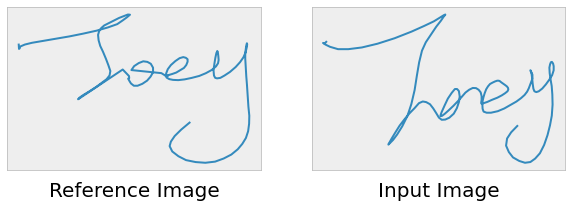

In [69]:
data_zip = data_path(user_id = 10)
example = data_zip.as_numpy_iterator().next()

show_sign(*example)

In [140]:
data_zip = data_path(user_id = 23)
data_zip = data_zip.cache()
data_zip = data_zip.shuffle(buffer_size = 1024)

train_data = data_zip.take(round(len(data_zip)*0.7))
train_data = train_data.batch(14)
train_data = train_data.prefetch(7)


test_data = data_zip.skip(round(len(data_zip)*0.7))
test_data = test_data.take(round(len(data_zip)*0.3))
test_data = test_data.batch(14)

In [141]:
def ERR(yyy, yyyhat):
    cm = sklearn.metrics.confusion_matrix(yyy, yyyhat)
    tn, fp, fn, tp = cm.ravel()
    # False acceptance rate
    FAR = fp/(fp+tn)
    # False rejection rate
    FRR = fn/(tp+fn)
    return FAR,FRR 

In [142]:
def embedding_model():
    input_layer = Input(shape=[1000,27], name = 'input_signature')
    Layer_1 = LSTM(54, activation = 'tanh' , recurrent_activation ='sigmoid' ,return_sequences=True , name = 'LSTM_layer_1')(input_layer)
    
    Layer_2 = LSTM(27, activation = 'tanh' , recurrent_activation ='sigmoid', return_sequences=True,name = 'LSTM_layer_2')(Layer_1)
      
    output_layer = Dense(27, activation="sigmoid" , name= 'Dense_layer')(Layer_2)
    
    flat = (output_layer)
    
    
    return Model(inputs=[input_layer] ,outputs = [output_layer], name = 'Input Parallel Pipelines')
    

In [143]:
embedding = embedding_model()


In [144]:
print(embedding.summary())


Model: "Input Parallel Pipelines"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_signature (InputLayer  [(None, 1000, 27)]       0         
 )                                                               
                                                                 
 LSTM_layer_1 (LSTM)         (None, 1000, 54)          17712     
                                                                 
 LSTM_layer_2 (LSTM)         (None, 1000, 27)          8856      
                                                                 
 Dense_layer (Dense)         (None, 1000, 27)          756       
                                                                 
Total params: 27,324
Trainable params: 27,324
Non-trainable params: 0
_________________________________________________________________
None


In [145]:
# tf.keras.utils.plot_model(embedding)

In [146]:
class L1Dist(Layer):
    def __init__(self,**kwargs):
        super().__init__()
    
    def call(self , input_embed, validation_embed):
        return tf.math.abs(input_embed - validation_embed)
    

In [147]:
def siamese_model():
    
    input_layer = Input(shape=[1000,27],name ='input_data' )
    validation_layer = Input(shape=[1000,27] ,name = 'validation_data')
    
    Layer_1_1 = LSTM(54, activation = 'tanh' , recurrent_activation ='sigmoid' ,return_sequences=True , name = 'LSTM_layer_1_input')(input_layer)
    Layer_1_2 = LSTM(54, activation = 'tanh' , recurrent_activation ='sigmoid' ,return_sequences=True , name = 'LSTM_layer_1_validation')(validation_layer)
    
    Layer_2_1 = LSTM(27, activation = 'tanh' , recurrent_activation ='sigmoid', return_sequences=True,name = 'LSTM_layer_2_input')(Layer_1_1)
    Layer_2_2 = LSTM(27, activation = 'tanh' , recurrent_activation ='sigmoid', return_sequences=True,name = 'LSTM_layer_2_validation')(Layer_1_2)
      
    output_layer_1 = Dense(27, activation="sigmoid" , name= 'Dense_layer_input')(Layer_2_1)
    output_layer_2 = Dense(27, activation="sigmoid" , name= 'Dense_layer_validation')(Layer_2_2)
    
#     flat = (output_layer_1)
#     flat = (output_layer_2)
    
    
#     input_layer = Input(shape=[1000,27],name ='input_data' )
    
#     validation_layer = Input(shape=[1000,27] ,name = 'validation_data')
    
    siamese_layer = L1Dist()
    
    siamese_layer._name = 'L1_Distance_Layer'
    
#     embedding = embedding_model() 
    
    
    distances = siamese_layer(output_layer_1,output_layer_2)
    
    Layer_3 = LSTM(27, activation = 'tanh' , recurrent_activation ='sigmoid', return_sequences=True,name = 'LSTM_layer_3')(distances)
    
    flat_layer = Flatten(name='Flatten')(Layer_3)
    
    classification_layer = Dense(1 , activation = 'sigmoid', name='classification_layer')(flat_layer)
    
    return Model(inputs = [input_layer , validation_layer] , outputs = classification_layer , name = 'Siamese_Architecture')

In [148]:
siamese_ = siamese_model()

In [149]:
siamese_.summary()

Model: "Siamese_Architecture"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_data (InputLayer)        [(None, 1000, 27)]   0           []                               
                                                                                                  
 validation_data (InputLayer)   [(None, 1000, 27)]   0           []                               
                                                                                                  
 LSTM_layer_1_input (LSTM)      (None, 1000, 54)     17712       ['input_data[0][0]']             
                                                                                                  
 LSTM_layer_1_validation (LSTM)  (None, 1000, 54)    17712       ['validation_data[0][0]']        
                                                                               

In [150]:
# tf.keras.utils.plot_model(siamese_)

In [151]:
def batch_fn(batch_1):

    inps=[]
    vals=[]
    batch_ls_y= []
    batch_1 = np.array(batch_1).T
    
    for i in batch_1:
        inp , val , label = (preprocess_twin(*i) )

        inps.append(inp)
        vals.append(val)

        batch_ls_y.append(label)

    return ([inps , vals , batch_ls_y])

In [152]:
siamese_ = siamese_model()
binary_cross_entropy = tf.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.Adam(0.0001)
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt=optimizer, siamese_model=siamese_)

def train_step(batch_):
    batch = batch_fn(batch_)
    loss_ls = []
    
    X = np.array(batch[:2])
       
    Y = np.array(batch[2]).reshape(-1,1)

    for x1,x2,y in zip(X[0],X[1],Y):
        with tf.GradientTape() as tape:
            
            x1 = x1.reshape(1,x1.shape[0],x1.shape[1])
            x2 = x2.reshape(1,x2.shape[0],x2.shape[1])
            y = y.reshape(1,y.shape[0])

            y_hat = siamese_([x1,x2] , training=True)

            loss = binary_cross_entropy(y, y_hat)
#             print(loss)
        

        grad = tape.gradient(loss, siamese_.trainable_variables)

        optimizer.apply_gradients(zip(grad, siamese_.trainable_variables))
    

    return loss

In [153]:
def train(data_, EPOCHS):
    r = Recall()
    p = Precision()
    acc = Accuracy()
    recall = []
    precision = []
    accuracy = []
    loss_ = []
    genuine=[]
    imposter=[]
    far_list=[]
    frr_list=[]
    FAR,FRR=0,0
    count = 0
    y_true = []
    y_pred = []
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data_))
        
        # Loop through each batch
        ls = []
        for idx, batch in enumerate(data_):
            # Run train step here
            x1 , x2 , y_ = batch_fn(batch)
            x1 = np.array(x1)
            x2 = np.array(x2)
            loss = train_step(batch)
            yhat = siamese_.predict([x1,x2])
            r.update_state(y_, yhat)
            p.update_state(y_, yhat) 
            
            ypred = [1 if prediction >= 0.5 else 0 for prediction in yhat ]
            y_true.append(y_)
            y_pred.append(ypred)
            
            acc.update_state(y_, [1 if prediction >= 0.5 else 0 for prediction in yhat ]) 
            [genuine.append(round(float(prediction),4)) if prediction >= 0.5 else imposter.append(round(float(prediction),4)) for prediction in yhat ]            
            if count == 0:
                FAR = (FAR + ERR(y_,[1 if prediction >= 0.5 else 0 for prediction in yhat ])[0])
                FRR = (FRR + ERR(y_,[1 if prediction >= 0.5 else 0 for prediction in yhat ])[1])
            else:
                FAR = (FAR + ERR(y_,[1 if prediction >= 0.5 else 0 for prediction in yhat ])[0])/2
                FRR = (FRR + ERR(y_,[1 if prediction >= 0.5 else 0 for prediction in yhat ])[1])/2
#             print(y_,[1 if prediction >= 0.5 else 0 for prediction in yhat ],'count')
            
            count +=1 
            
            progbar.update(idx+1)
        print(loss.numpy(), r.result().numpy(), p.result().numpy(),acc.result().numpy())
        recall.append(r.result().numpy())
        precision.append(p.result().numpy())
        accuracy.append(acc.result().numpy())
        loss_.append(loss.numpy())
        far_list.append(FAR)
        frr_list.append(FRR)
    y_true = np.hstack(y_true) 
    y_pred = np.hstack(y_pred)
    return recall , precision , accuracy ,loss_ ,genuine ,imposter,far_list,frr_list,y_true,y_pred
        
#         # Save checkpoints
#         if epoch % 10 == 0: 
#             checkpoint.save(file_prefix=checkpoint_prefix)

In [154]:
# for idx, batch in enumerate(train_data):
#             # Run train step here
            
#             x1 , x2 , y_ = batch_fn(batch)
#             x1 = np.array(x1)
#             x2 = np.array(x2)
#             loss = train_step(batch)
#             yhat = siamese_.predict([x1,x2])
#             FAR = (FAR + ERR(y_,[1 if prediction >= 0.5 else 0 for prediction in yhat ])[0])
            
#             print(FAR)
#             break

In [155]:
recall , precision , accuracy , loss, genuine ,imposter,FAR_,FRR_,y_true,y_pred = train(train_data, EPOCHS=100)


 Epoch 1/100
1/1 [==============================] - 7s 7s/step
0.64753675 1.0 0.72727275 0.78571427

 Epoch 2/100
1/1 [==============================] - 5s 5s/step
0.59191895 1.0 0.8235294 0.89285713

 Epoch 3/100
1/1 [==============================] - 5s 5s/step
0.6276711 1.0 0.88 0.9285714

 Epoch 4/100
1/1 [==============================] - 5s 5s/step
0.4459303 1.0 0.90909094 0.9464286

 Epoch 5/100
1/1 [==============================] - 5s 5s/step
0.5365678 1.0 0.925 0.95714283

 Epoch 6/100
1/1 [==============================] - 5s 5s/step
0.45137405 1.0 0.9347826 0.96428573

 Epoch 7/100
1/1 [==============================] - 5s 5s/step
0.1777668 1.0 0.9423077 0.96938777

 Epoch 8/100
1/1 [==============================] - 5s 5s/step
0.0074444986 1.0 0.9491525 0.97321427

 Epoch 9/100
1/1 [==============================] - 5s 5s/step
0.01969219 1.0 0.95454544 0.97619045

 Epoch 10/100
1/1 [==============================] - 5s 5s/step
0.010294411 1.0 0.9594595 0.9785714

 Epoch 1

1/1 [==============================] - 5s 5s/step
5.7523815e-05 1.0 0.99482757 0.9973545

 Epoch 82/100
1/1 [==============================] - 5s 5s/step
1.0734402e-09 1.0 0.99489796 0.99738675

 Epoch 83/100
1/1 [==============================] - 5s 5s/step
1.752272e-05 1.0 0.994958 0.9974182

 Epoch 84/100
1/1 [==============================] - 5s 5s/step
4.1785e-08 1.0 0.99501663 0.997449

 Epoch 85/100
1/1 [==============================] - 5s 5s/step
9.920308e-06 1.0 0.9950739 0.99747896

 Epoch 86/100
1/1 [==============================] - 5s 5s/step
1.8887021e-06 1.0 0.9951299 0.9975083

 Epoch 87/100
1/1 [==============================] - 5s 5s/step
1.9882518e-05 1.0 0.9951846 0.99753696

 Epoch 88/100
1/1 [==============================] - 5s 5s/step
1.3072026e-05 1.0 0.99525315 0.9975649

 Epoch 89/100
1/1 [==============================] - 5s 5s/step
5.0118688e-05 1.0 0.9953052 0.9975923

 Epoch 90/100
1/1 [==============================] - 5s 5s/step
0.00019435855 1.0 0.995

In [157]:
loss[-1],accuracy[-1],precision[-1],recall[-1] 

(3.3418022e-08, 0.99785715, 0.9958217, 1.0)

In [133]:
ERR([0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0], [0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0])

(0.0, 0.1111111111111111)

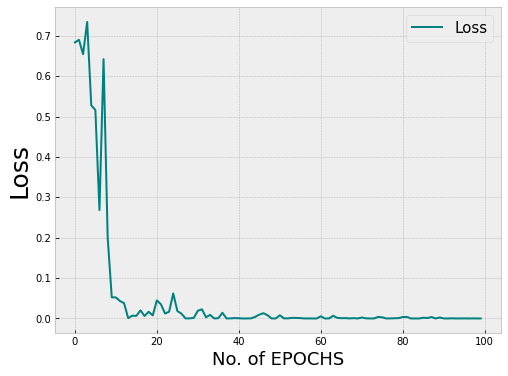

In [134]:
plt.style.use('bmh')
plt.figure(figsize=(8,6))

plt.plot(loss,label ='Loss',color='teal')
# plt.title('Figure 1: Training Loss',fontsize=25,y=-.2)
plt.xlabel('No. of EPOCHS',fontsize=18)
plt.ylabel('Loss',fontsize=25)
plt.legend(loc=1,fontsize=15)

plt.show()

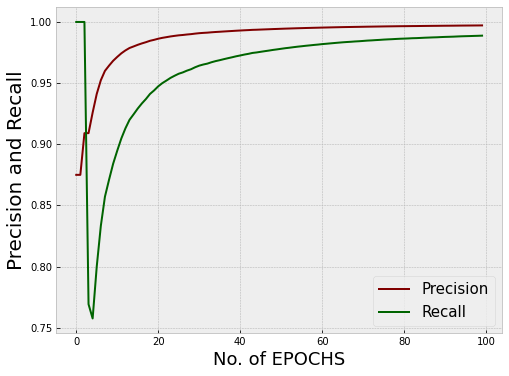

In [135]:
# plt.style.use('ggplot')
plt.figure(figsize=(8,6))

plt.plot(precision, label='Precision',color='maroon')
plt.plot(recall , label='Recall',color='darkgreen')
# plt.title('Figure 2: Precision and Recall for Training Data',fontsize=25,y=-.2)
plt.xlabel('No. of EPOCHS',fontsize=18)
plt.ylabel('Precision and Recall',fontsize=20)
plt.legend(loc=4,fontsize=15)
plt.show()

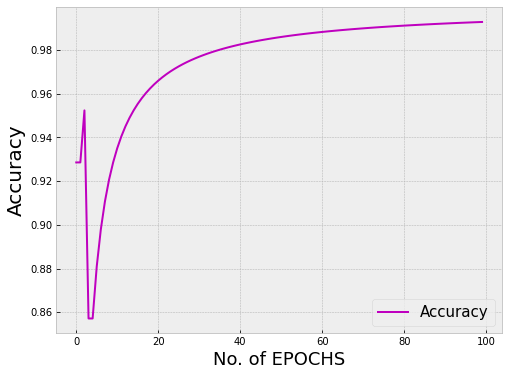

In [136]:
# plt.style.use('ggplot')
plt.figure(figsize=(8,6))

plt.plot(accuracy , label ='Accuracy',color='m')
# plt.title('Figure 3: Training Accuracy',fontsize=25,y=-.2)
plt.xlabel('No. of EPOCHS',fontsize=18)
plt.ylabel('Accuracy',fontsize=20)
plt.legend(loc=4,fontsize=15)

plt.show()

C:\Users\Arpan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Arpan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


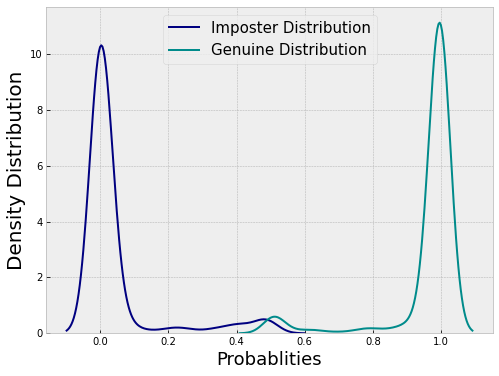

In [137]:
plt.figure(figsize=(8,6))

sns.distplot(imposter,color = 'navy',label='Imposter Distribution',hist=False)
sns.distplot(genuine,color='darkcyan',label='Genuine Distribution',hist=False)
# plt.title('Figure 4: Distribution of Training samples',fontsize=25,y=-.2)
plt.xlabel('Probablities',fontsize=18)
plt.ylabel('Density Distribution',fontsize=20)
plt.legend(loc=9,fontsize=15)

plt.show()

In [138]:
def test(test_data):
    test_batch = test_data.as_numpy_iterator()
    batch_2 = (test_batch.next())
    x1_ , x2_ , y_ = batch_fn(batch_2)
    predicted = []
    actual = []
    x1_ = np.array(x1_)
    x2_ = np.array(x2_)
    for x1,x2,y in zip(x1_,x2_,y_):
        plt.figure(figsize = (10,3))
        plt.subplot(1,2,1)
        plt.plot(x1.T[0],x1.T[1] )
        plt.title('Reference Image',{'fontsize':20},y=-0.2)
        plt.xticks([])
        plt.yticks([])

        plt.subplot(1,2,2)
        plt.plot(x2.T[0],x2.T[1])
        plt.title('Input Image',{'fontsize':20},y=-0.2)
        plt.xticks([])
        plt.yticks([])
        plt.show()

        x1 = x1.reshape(1,x1.shape[0],x1.shape[1])
        x2 = x2.reshape(1,x2.shape[0],x2.shape[1])
        predicted.append((lambda i: 1 if i>=0.5 else 0)(siamese_.predict([x1,x2])))
        actual.append(y)
        print(siamese_.predict([x1,x2]))
        print(f"Actual Output : {y}")
        print(f"Predicted Output : {(lambda i: 1 if i>=0.5 else 0)(siamese_.predict([x1,x2]))}" )
        
    p = Precision()
    p.update_state(actual , predicted)
    print("\n\nPrecision :",p.result().numpy())

    m = Recall()
    m.update_state(actual , predicted)
    print("Recall :",m.result().numpy())
    return actual , predicted

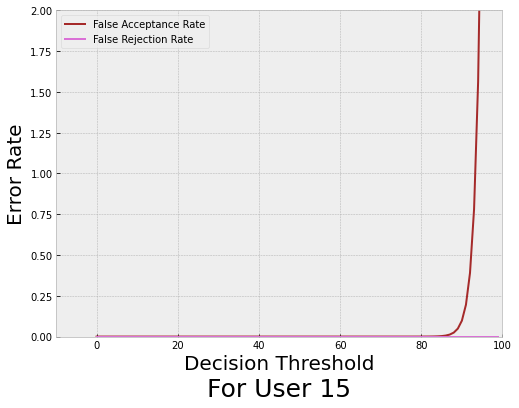

In [166]:
# plt.style.use('ggplot')
plt.figure(figsize=(8,6))

plt.plot(np.sort(FAR_)*100, label='False Acceptance Rate',color='brown')
plt.plot(np.sort(FRR_)[::-1]*100 , label='False Rejection Rate',color='orchid')
# plt.plot(x,y, 'ro')

# plt.ylabel('Density Distribution',fontsize=20)
plt.title('For User 15',fontsize=25,y=-.2)

plt.xlabel('Decision Threshold',fontsize=20)
plt.ylabel('Error Rate',fontsize=20)


plt.legend(loc=9,fontsize=20)
plt.ylim([0, 2])
plt.xlim([-10,100])
plt.legend()
plt.show()

In [169]:
FRR_

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

(0.0, 2.0)

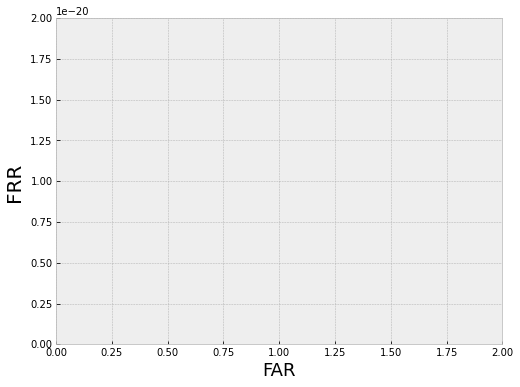

In [48]:
plt.figure(figsize=(8,6))

plt.plot(np.sort(FRR_)[::-1]*100,np.sort(FAR_)*100, label='ERR',color='green')
plt.plot(yz,xz*49000000,'ro')
plt.xlabel('FAR',fontsize=18)
plt.ylabel('FRR ',fontsize=20)
plt.ylim([0, 2e-20])
plt.xlim([0,2])

In [350]:
intersection.xy

(array('d', [5.700947225981055]), array('d', [0.05006765899864682]))

In [45]:
for i,j in zip(range(1,len(np.sort(FRR_)[::-1])),range(1,len(np.sort(FAR_)))):
    if np.sqrt(((np.sort(FRR_)[::-1])[i]+1)**2+((np.sort(FAR_))[i]+1)**2) > np.sqrt(((np.sort(FRR_)[::-1])[i-1]+1)**2+((np.sort(FAR_))[i-1]+1)**2):
        xz,yz = np.sort(FRR_)[::-1][i] , np.sort(FAR_)[i]
        z1,z2 = i,j

In [46]:
xz,yz,z1

(6.195830603018292e-20, 0.17871148245675222, 99)

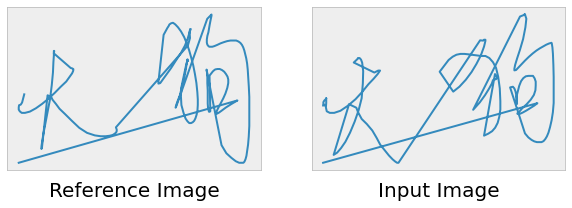

[[0.00257553]]
Actual Output : 0.0
Predicted Output : 0


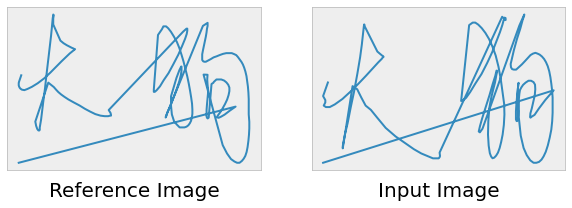

[[0.9999893]]
Actual Output : 1.0
Predicted Output : 1


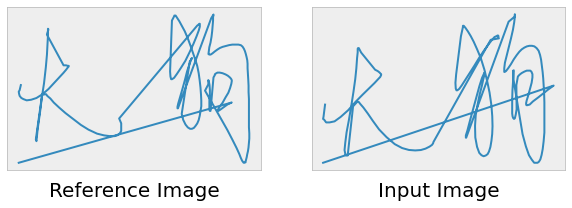

[[0.999814]]
Actual Output : 1.0
Predicted Output : 1


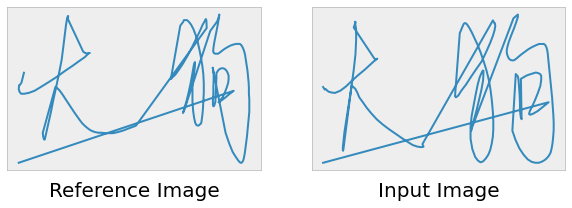

[[0.99897754]]
Actual Output : 1.0
Predicted Output : 1


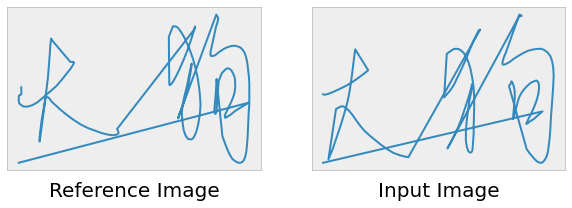

[[0.00029434]]
Actual Output : 0.0
Predicted Output : 0


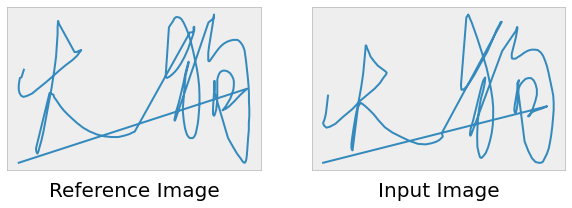

[[0.9998907]]
Actual Output : 1.0
Predicted Output : 1


Precision : 1.0
Recall : 1.0


In [43]:
y_true , y_pred = test(test_data)

In [249]:
yyyhat = np.random.randint(0,2,(1,10))
yyy= np.random.randint(0,2,(1,10))
import sklearn.metrics

0.125

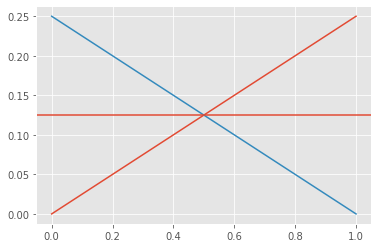

In [247]:
cm = sklearn.metrics.confusion_matrix(yyy, yyyhat)
# cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] 

FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)  
TP = np.diag(cm) 
TN = (len(yyy) - (FP + FN + TP))

# False positive rate
FPR = FP/(FP+TN)

# False negative rate
FNR = FN/(TP+FN)


plt.plot(np.sort(FPR)) # Sorted in ascending order
plt.plot(np.sort(FNR)[::-1]) # Sorted in descending order
plt.axhline(y=compute_eer(yyy,yyyhat))
compute_eer(yyy,yyyhat)

In [231]:
compute_eer(yyy,yyyhat)

0.875

In [901]:
accuracy[-1]

0.9635714

C:\Users\Arpan\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


In [258]:
assd = np.array([])

In [261]:
np.hstack(ls)

array([1, 2, 3, 5])

In [260]:
ls = [[1,2],[3,5]]

In [238]:
def compute_eer(label, pred, positive_label=1):
    # all fpr, tpr, fnr, fnr, threshold are lists (in the format of np.array)
    fpr, tpr, threshold = sklearn.metrics.roc_curve(label, pred, pos_label=positive_label)
    fnr = 1 - tpr

    # the threshold of fnr == fpr
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]

    # theoretically eer from fpr and eer from fnr should be identical but they can be slightly differ in reality
    eer_1 = fpr[np.nanargmin(np.absolute((fnr - fpr)))]
    eer_2 = fnr[np.nanargmin(np.absolute((fnr - fpr)))]

    # return the mean of eer from fpr and from fnr
    eer = (eer_1 + eer_2) / 2
    return eer

(48.666666666666664, 0.0)


In [199]:
idx

52

In [316]:
from sympy import Point, Line, Segment
  
p1, p2, p3, p4 = Point(46,FAR_[46]), Point(48,FAR_[48]), Point(46,FRR_[46]), Point(48,FRR_[48])
l1 = Line(p1, p2)
s1 = Segment(p3, p4)
  
  
# using intersection() method
showIntersection = l1.intersection(s1)
  
print(showIntersection)

[Segment2D(Point2D(46, 649639072694949/10000000000000000000000000000), Point2D(48, 162409768173737/10000000000000000000000000000))]
